<a href="https://colab.research.google.com/github/cyber-prags/ML-and-BioOptimization/blob/main/N_arm_bandit4_modif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-arm bandit problem

-- _Pragyan Jyoti Dutta(201771610) , Patalo Selobakin, Victor Gonzalez Alvarez, Daniela Dzah_

## Importing the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Setting the initial parameters

In [11]:
# Set the seed for reproducibility
np.random.seed(0)

# Parameters
n_bandit = 2000  # number of bandit problems
k_values = [5, 10, 20]  # different numbers of arms in each bandit problem
epsilon_options = [0, 0.01, 0.1, 0.5, 1]  # epsilon values to test
max_steps = 1000  # maximum number of steps for each epsilon value



In the above **epsilon_values** sets the epsilon values; each determining the probability of choosing exploration over exploitation. Values close to _1_ being more inclined towards more exploration while values close to _0_ being close to preferring more exploitation over exploration.

## Greedy Epsilon Function

In [18]:
# Function to run the epsilon-greedy bandit algorithm until convergence
def run_epsilon_greedy_bandit(n_bandit, k, epsilon):
    q_true = np.random.normal(0, 1, (n_bandit, k))  # true means q*(a) for each arm for all bandits
    true_opt_arms = np.argmax(q_true, axis=1)  # true optimal arms in each bandit

    # Initialize variables
    Q = np.zeros((n_bandit, k))  # reward estimated
    N = np.ones((n_bandit, k))  # number of times each arm was pulled
    rewards = []
    optimal_action_count = []

    # Run the bandit algorithm until maximum steps reached
    for steps in range(1, max_steps + 1):
        R_pull = []  # all rewards in this pull/time-step
        opt_arm_pull = 0  # number of pulls of best arm in this time step
        for i in range(n_bandit):
            if np.random.random() < epsilon:
                j = np.random.randint(k)
            else:
                j = np.argmax(Q[i])

            if j == true_opt_arms[i]:  # To calculate % optimal action
                opt_arm_pull += 1

            reward_pulled = np.random.normal(q_true[i][j], 1)
            R_pull.append(reward_pulled)
            N[i][j] += 1
            Q[i][j] += (reward_pulled - Q[i][j]) / N[i][j]

        avg_R_pull = np.mean(R_pull)
        rewards.append(avg_R_pull)
        optimal_action_count.append(float(opt_arm_pull) * 100 / n_bandit)

    return rewards, optimal_action_count,Q


### Plotting our graphs

Running simulations for k = 5
Current epsilon: 0
Q-values for the arms:
Arm 1: 0.02319279033933604
Arm 2: 0.038528404625160544
Arm 3: 0.0036676506942680083
Arm 4: 0.01331409952494083
Arm 5: 0.0002143279597216221
 
Average rewards: [0.02909862894138581, 0.3703342244922189, 0.48856629786423866, 0.637178680286923, 0.6748831669345542, 0.7596102186024203, 0.747030760844565, 0.7584298162041948, 0.7765433809686324, 0.8490446261645973, 0.8315246497844715, 0.8561234910548492, 0.8200463522097811, 0.8319296015282678, 0.8520662873059917, 0.8529669446038124, 0.8768874879892381, 0.8864311264625993, 0.8636631168440779, 0.882345641221596, 0.8785297876799656, 0.878364271438091, 0.9115248285515044, 0.9299296464198143, 0.872529761533172, 0.8885185326032112, 0.896628198001021, 0.8881353749489037, 0.9243898299344603, 0.8957878274652497, 0.8923082277934057, 0.9154121327252256, 0.8725210064263312, 0.897322716769453, 0.8869566051602419, 0.8793380048854551, 0.8796868467032268, 0.8712279847871582, 0.90455726514

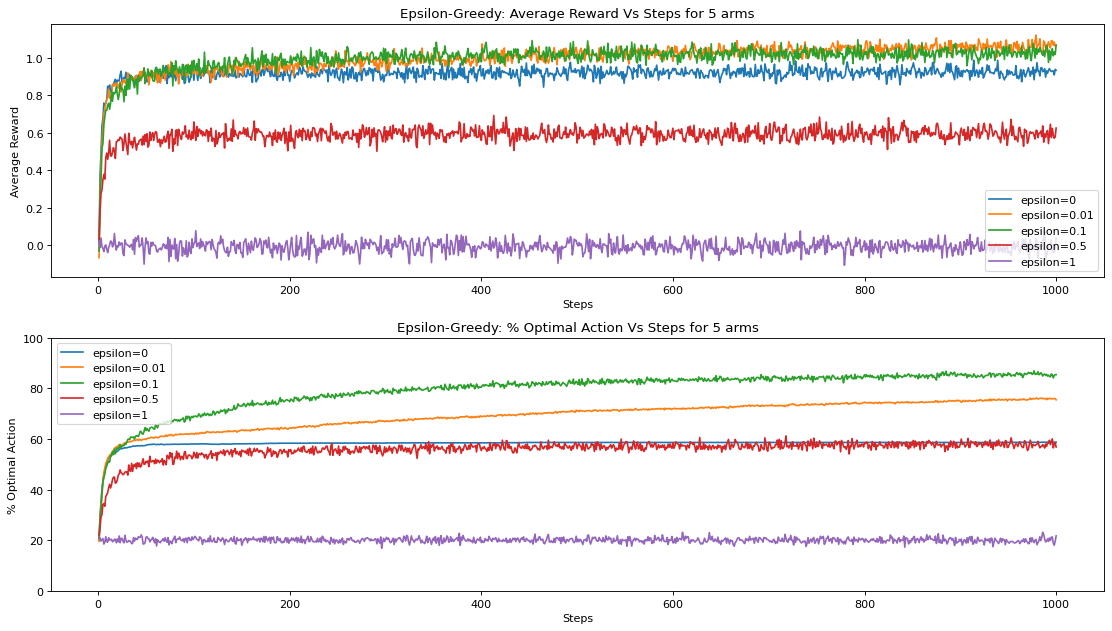

Running simulations for k = 10
Current epsilon: 0
Q-values for the arms:
Arm 1: -0.006798626400145904
Arm 2: -0.005332142026899895
Arm 3: 0.007671759950766716
Arm 4: 0.0066681492138030585
Arm 5: -0.01549543160117329
Arm 6: -0.0013251596035299142
Arm 7: 0.005201473414047321
Arm 8: -0.0002264098032172157
Arm 9: 0.0013579857809589962
Arm 10: 0.0026655887089211696
 
Average rewards: [0.017094174907507812, 0.26047812835365697, 0.4713143403076916, 0.5921064388065495, 0.5860454628989067, 0.6795913148831937, 0.7507949651781439, 0.6978253940662629, 0.8144259548809425, 0.8379516660354865, 0.8243290899931287, 0.8199615459978169, 0.886883789559075, 0.8849352490931401, 0.9370891646737824, 0.9167060923322508, 0.9019452363246573, 0.92413086539686, 0.942028079922376, 0.9565804466567716, 0.9600245315276102, 0.9514980712085298, 0.985883255020397, 0.9653424374767126, 0.9329609852618167, 0.954522305807255, 1.0197861624234892, 0.9799510038962441, 0.9431396349635097, 0.9819511292278292, 1.0261988571488396, 

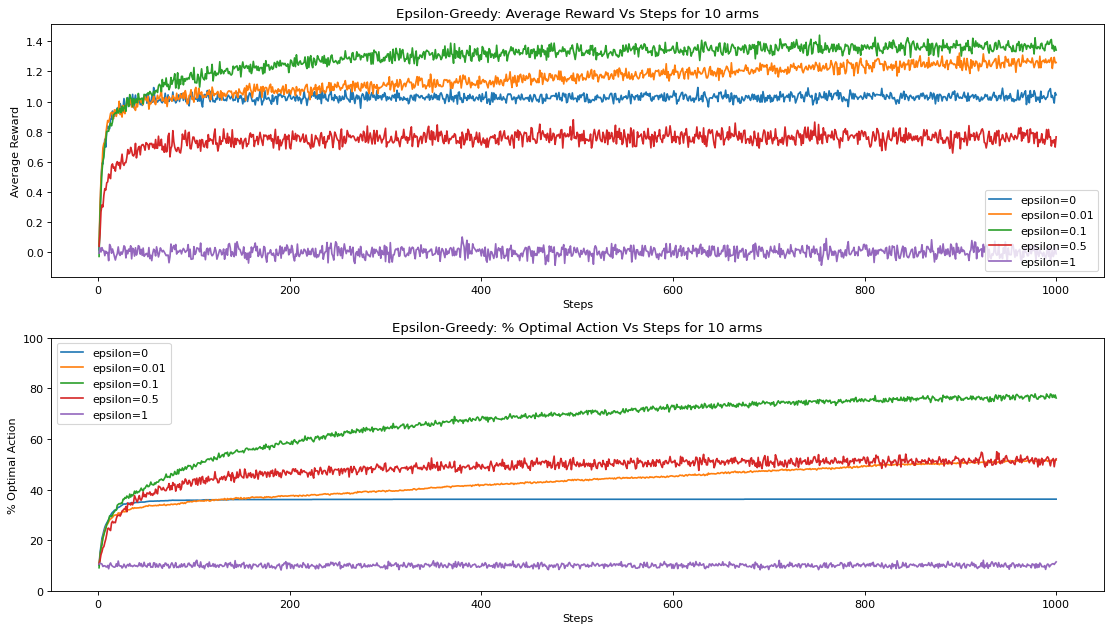

Running simulations for k = 20
Current epsilon: 0
Q-values for the arms:
Arm 1: 0.014325438516917898
Arm 2: 0.0041247417659038554
Arm 3: 0.006959719192101757
Arm 4: -0.011746656218689698
Arm 5: 0.0007298134049652418
Arm 6: 0.008809268334744552
Arm 7: 0.0031128460827855573
Arm 8: -0.0001996789714696935
Arm 9: -0.0018430231076080094
Arm 10: 0.003202506855934756
Arm 11: 0.00042386211941989216
Arm 12: -0.00019417055215826696
Arm 13: -0.0038694453072301268
Arm 14: -0.00011790795285253375
Arm 15: 0.001755816397374415
Arm 16: -0.0006519838029951052
Arm 17: -0.0013521609288506182
Arm 18: -0.0002609213423152127
Arm 19: -0.00020611982780860446
Arm 20: -0.0013168559284266455
 
Average rewards: [0.04733968408744187, 0.3240051271169776, 0.471579493634263, 0.5284889705818574, 0.6268423176797835, 0.6771479720302318, 0.7487556950061967, 0.7813292850036181, 0.8237680706307162, 0.8823278570325959, 0.889913882818879, 0.8612558637850737, 0.8772177876668036, 0.8932170679712835, 0.929115304651331, 0.9370959

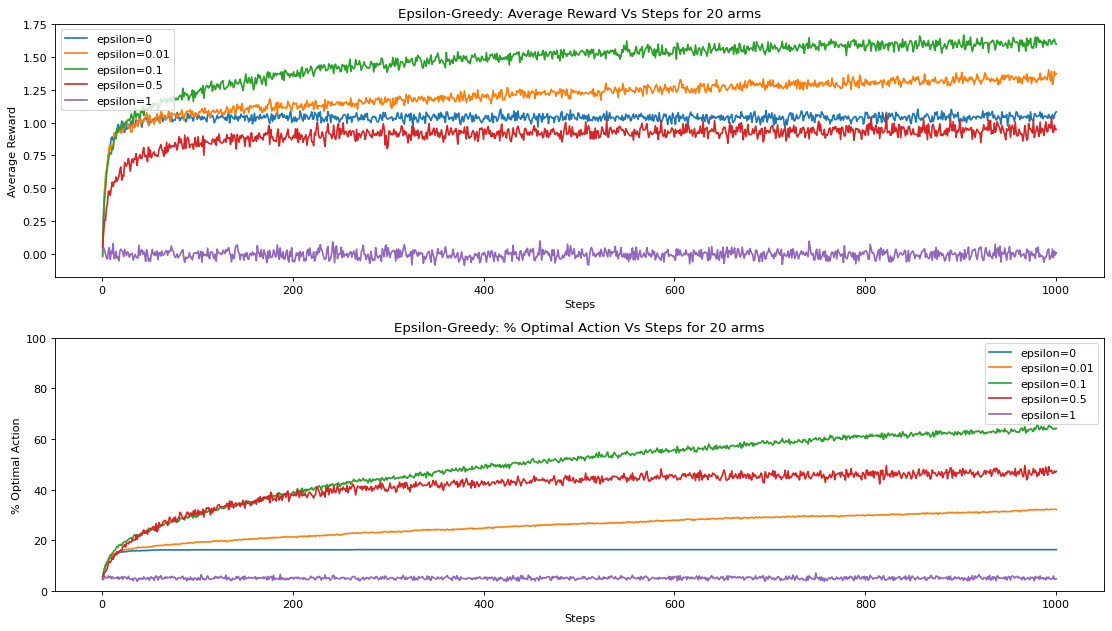

In [27]:
# Loop over different k values
for k in k_values:
    print(f'Running simulations for k = {k}')
    fig, axes = plt.subplots(2,1 , figsize=(14, 8), dpi=80)

    # Loop over different epsilon values
    for epsilon in epsilon_options:
        print('Current epsilon:', epsilon)

        # Run the bandit algorithm
        avg_rewards, opt_action_percentages, Q = run_epsilon_greedy_bandit(n_bandit, k, epsilon)
        # Print the Q-values
        print('Q-values for the arms:')
        for arm_index in range(k):
            print(f'Arm {arm_index + 1}:', Q[:, arm_index].mean())  # Print the average Q-value for each arm across all bandits
        print(' ')
        print('Average rewards:', avg_rewards)
        print(' ')
        print('Percentage of optimal action:',opt_action_percentages)
        print(' ')
        print("Total average reward :", sum(avg_rewards))
        print(' ')
        print(f'Optimal percentage of optimal action for epsilon= {epsilon} and arm= {k}:', max(opt_action_percentages))
        print('----------------------------------------------------------------------------------')
        print(' ')
        print(' ')

        # Plotting
        axes[0].plot(range(1, len(avg_rewards) + 1), avg_rewards, label=f'epsilon={epsilon}')
        axes[1].plot(range(1, len(opt_action_percentages) + 1), opt_action_percentages, label=f'epsilon={epsilon}')

    # Set labels and titles
    axes[0].set_title(f'Epsilon-Greedy: Average Reward Vs Steps for {k} arms')
    axes[0].set_ylabel('Average Reward')
    axes[0].set_xlabel('Steps')
    axes[0].legend()

    axes[1].set_title(f'Epsilon-Greedy: % Optimal Action Vs Steps for {k} arms')
    axes[1].set_ylabel('% Optimal Action')
    axes[1].set_xlabel('Steps')
    axes[1].set_ylim(0, 100)
    axes[1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
